<a href="https://colab.research.google.com/github/terryljh/aviation2/blob/main/asrs%20data%20cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
#collect all csvs in one list to read them all into one dataframe
csv_urls = [
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/jan2005-jun2005.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/jul2005-mar2006.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/april2006-november2006.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/december2006-august2007.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/september2007-may2008.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/june2008-february2009.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/march2009-november2009.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/december2009-august2010.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/september2010-may2011.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/june2011-february2012.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/march2012-november2012.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/december2012-august2013.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/september2013-may2014.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/june2014-april2015.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/may2015-january2016.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/february2016-december2016.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/january2017-november2017.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/december2017-october2018.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/november2018-july2019.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/august2019-may2020.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/june2020-april2021.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/may2021-apr2022.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/may2022-mar2023.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/apr2023-mar2024.csv',
    'https://github.com/terryljh/aviation2/raw/refs/heads/main/ASRS%20data/apr2024-dec2025.csv']
    #this code usually takes about 15-30 seconds to read in all csv's
df = pd.concat([pd.read_csv(url) for url in csv_urls], ignore_index=True)
pd.set_option('display.max_columns', None)
new_headers = df.iloc[0] #dataset has headers, then the first row is the actual headings,
#so we want to replace headers with the first row new_headers

#removes anomolous dates that are in by mistake, should only be April 2024-May 2025

# Make the headers unique, in case some are repeated, function relabels 2,3 etc
#The ASRS occasionally has multiple reports for a single incident
#If we want to include second,third reports in our data, we need to include the
#second version of those columns too, but for simplicity maybe we only take the
#first report of each incident for now?
def make_unique(headers):
    counts = {}
    unique_headers = []
    for col in headers:
        if col in counts:
            counts[col] += 1
            unique_headers.append(f"{col}_{counts[col]}")
        else:
            counts[col] = 0
            unique_headers.append(col)
    return unique_headers
unique_headers = make_unique(new_headers)

df.columns = unique_headers
df = df.iloc[1:].reset_index(drop=True) #remove unnecessary first row

df['Date']= df['Date'].values
df['Date'] = pd.to_numeric(df['Date'], errors='coerce')
#the date column is of type string, we change to integer so we can manipulate it
#errors='coerce' will return NaN if not a number
dfsubset = df[['Date', 'Locale Reference', 'State Reference', 'Operating Under FAR Part','Mission','Light', 'Flight Phase','Function', 'Contributing Factors / Situations', 'Primary Problem']]
dfsubset=dfsubset.copy()
dfsubset = dfsubset[(dfsubset['Date']//100 >= 2004) & (dfsubset['Date']//100 <= 2026)]
# there are accidentally some lines where the year is 0 BC, so we remove them

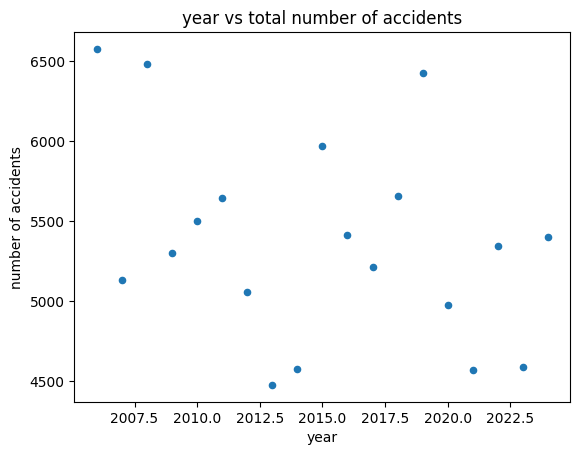

LinearRegression()

In [41]:
dfsubset2 = dfsubset[(dfsubset['Date']//100 >= 2006) & (dfsubset['Date']//100 <= 2024)]
#for the yearly counts, we cannot include 2025, because the data is not complete
#we do not include 2005 because anonymised reporting began in 2006
yearly_counts = dfsubset2.groupby(dfsubset2['Date']//100).size().reset_index(name='Accident_Count')
yearly_counts.plot.scatter(x='Date', y='Accident_Count')
plt.title('year vs total number of accidents')
plt.xlabel('year')
plt.ylabel('number of accidents')
plt.show()

from sklearn.linear_model import LinearRegression
slryearly = LinearRegression()
slryearly.fit(yearly_counts[['Date']],yearly_counts['Accident_Count'])

In [42]:
#re-doing the above with sm so we can use model summary
#decreasing trend but unreliable p-value
import statsmodels.api as sm
dfsubset2 = dfsubset[(dfsubset['Date']//100 >= 2006) & (dfsubset['Date']//100 <= 2024)]
yearly_counts = dfsubset2.groupby(dfsubset2['Date']//100).size().reset_index(name='Accident_Count')
yearly_counts.rename(columns={yearly_counts.columns[0]: 'Year'}, inplace=True)
X = sm.add_constant(yearly_counts['Year'])
y = yearly_counts['Accident_Count']
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Accident_Count   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     2.376
Date:                Thu, 05 Jun 2025   Prob (F-statistic):              0.142
Time:                        17:24:57   Log-Likelihood:                -147.94
No. Observations:                  19   AIC:                             299.9
Df Residuals:                      17   BIC:                             301.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.549e+04    5.2e+04      1.645      0.1

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [43]:
#trying monthly counts instead of yearly counts, but without distinguishing months
#shows decreasing trend but unreliable p-value
import statsmodels.api as sm

dfsubset2 = dfsubset[(dfsubset['Date']//100 >= 2006) & (dfsubset['Date']//100 <= 2024)]

monthly_counts = dfsubset2.groupby(dfsubset2['Date']%100).size().reset_index(name='Accident_Count_Per_Month')
monthly_counts.rename(columns={monthly_counts.columns[0]: 'Month'}, inplace=True)

X = sm.add_constant(monthly_counts['Month'])
y = monthly_counts['Accident_Count_Per_Month']

model = sm.OLS(y, X).fit()

print(model.summary())


                               OLS Regression Results                               
Dep. Variable:     Accident_Count_Per_Month   R-squared:                       0.136
Model:                                  OLS   Adj. R-squared:                  0.050
Method:                       Least Squares   F-statistic:                     1.575
Date:                      Thu, 05 Jun 2025   Prob (F-statistic):              0.238
Time:                              17:25:00   Log-Likelihood:                -91.609
No. Observations:                        12   AIC:                             187.2
Df Residuals:                            10   BIC:                             188.2
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [38]:
#add months (and possibly other things) as categorical variables
import statsmodels.api as sm

dfsubset2=dfsubset2.copy()
dfsubset2['Year'] = dfsubset2['Date']//100
dfsubset2['Month'] = dfsubset2['Date']%100
grouped = dfsubset2.groupby(['Year', 'Month']).size().reset_index(name='count')
month_dummies = pd.get_dummies(grouped['Month'], prefix='Month', drop_first=True)
#remove january because it is the baseline
X = pd.concat([grouped[['Year']], month_dummies], axis=1)
#y_true = dfsubset2.groupby(dfsubset2['Year','Month'].size().reset_index(name='Accident_Count'))
y_true = grouped['count']
#grouped
monthmodel = LinearRegression()
monthmodel.fit(X,y_true)

r2=r2_score(y_true, monthmodel.predict(X))

# adjusted R^2
n = X.shape[0]  # number of samples
p = X.shape[1]  # number of predictors (features)

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R^2: {r2:.4f}")
print(f"Adjusted R^2: {adjusted_r2:.4f}")

#redoing above with sm so we can use model summary
import statsmodels.api as sm

dfsubset2=dfsubset2.copy()
dfsubset2['Year'] = dfsubset2['Date']//100
dfsubset2['Month'] = dfsubset2['Date']%100
grouped = dfsubset2.groupby(['Year', 'Month']).size().reset_index(name='count')
month_dummies = pd.get_dummies(grouped['Month'], prefix='Month', drop_first=True)

grouped['Year'] = pd.to_numeric(grouped['Year'], errors='coerce')
month_dummies = month_dummies.astype(float)

X = pd.concat([grouped[['Year']], month_dummies], axis=1)

X = X.dropna()
y_true = grouped.loc[X.index, 'count'] # Align y_true with the cleaned X

X = sm.add_constant(X, prepend=False)

monthmodel2 = sm.OLS(y_true, X).fit()
monthmodel2.summary()




R^2: 0.1495
Adjusted R^2: 0.1020


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     3.149
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           0.000375
Time:                        17:22:27   Log-Likelihood:                -1323.3
No. Observations:                 228   AIC:                             2673.
Df Residuals:                     215   BIC:                             2717.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year          -3.3129      0.999     -3.316      0.001      -5.282      -1.343
Month_2.0    -30.1579     26.811     -1.125      0.262     -83.004      22.688
Month_3.0     11.0526     26.811      0.412      0.681     -41.793      63.898
Month_4.0      2.8421     26.811      0.106      0.916     -50.004      55.688
Month_5.0     25.1579     26.811      0.938      0.349     -27.688      78.004
Month_6.0     45.3684     26.811      1.692      0.092      -7.477      98.214
Month_7.0     86.8947     26.811      3.241      0.001      34.049     139.741
Month_8.0     47.0000     26.811      1.753      0.081      -5.846      99.846
Month_9.0      8.9474     26.811      0.334      0.739     -43.898      61.793
Month_10.0    37.1053     26.811      1.384      0.168     -15.741      89.951
Month_11.0    11.8947     26.811      0.444      0.658     -40.951      64.741
Month_12.0    15.2105     26.811      0.567      0.571     -37.635      68.056
const       7102.4240   2013.442      3.528      0.001    3133.810    1.11e+04
==============================================================================
Omnibus:                        7.448   Durbin-Watson:                   0.619
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                8.530
Skew:                           0.291   Prob(JB):                       0.0141
Kurtosis:                       3.747   Cond. No.                     7.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""